In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
#load train dataset csv
df = pd.read_csv("/Users/sa21/Desktop/Podcast_Prediction/Data/raw/train.csv")
df.head()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [3]:
#save columns names 
col_names = df.columns
col_names

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment', 'Listening_Time_minutes'],
      dtype='object')

In [4]:
#column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


Data Types Overview

The dataset contains a mix of numerical (float64, int64) and categorical (object) columns:

Numerical Columns (Continuous/Discrete Values)

Episode_Length_minutes

Host_Popularity_percentage

Guest_Popularity_percentage

Number_of_Ads

Listening_Time_minutes

Categorical Columns (Text/Labels)

Podcast_Name

Episode_Title

Genre

Publication_Day

Publication_Time

Episode_Sentiment

In [5]:
# looking for null values
df.isnull().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [6]:
#numbers of rows
rows = len(df)
print(rows)

750000


There are 87093 null values for Episode_Length_minutes and 146030, with Number_of_Ads  with 1 null. The null values in Episode_Length_minutes and Episode_Length_minutes are a desent amount based the numbers of rows of 750000. 

In [7]:
# podcast names and number of podcast 
name_list = df['Podcast_Name'].unique()
unique_count = len(name_list)
print(unique_count)
print(name_list)

48
['Mystery Matters' 'Joke Junction' 'Study Sessions' 'Digital Digest'
 'Mind & Body' 'Fitness First' 'Criminal Minds' 'News Roundup'
 'Daily Digest' 'Music Matters' 'Sports Central' 'Melody Mix' 'Game Day'
 'Gadget Geek' 'Global News' 'Tech Talks' 'Sport Spot' 'Funny Folks'
 'Sports Weekly' 'Business Briefs' 'Tech Trends' 'Innovators'
 'Health Hour' 'Comedy Corner' 'Sound Waves' 'Brain Boost'
 "Athlete's Arena" 'Wellness Wave' 'Style Guide' 'World Watch' 'Humor Hub'
 'Money Matters' 'Healthy Living' 'Home & Living' 'Educational Nuggets'
 'Market Masters' 'Learning Lab' 'Lifestyle Lounge' 'Crime Chronicles'
 'Detective Diaries' 'Life Lessons' 'Current Affairs' 'Finance Focus'
 'Laugh Line' 'True Crime Stories' 'Business Insights' 'Fashion Forward'
 'Tune Time']


There are a total of 48 unique podcast names in the dataset. There is a diverse range of themes and genres, including news, entertainment, health, technology, sports, and lifestyle.

In [8]:
# Impute missing values within each podcast group using the median
df['Episode_Length_minutes'] = df.groupby('Podcast_Name')['Episode_Length_minutes'].transform(
    lambda x: x.fillna(x.median())) # handling missing values for Episode_Length_minutes
df['Guest_Popularity_percentage'] = df.groupby('Podcast_Name')['Guest_Popularity_percentage'].transform(
    lambda x: x.fillna(x.median())) # handling missing values for Guest_Popularity_percentage
df['Number_of_Ads'] = df.groupby('Podcast_Name')['Number_of_Ads'].transform(
    lambda x: x.fillna(x.median())) # handling missing values for Number_of_Ads
# Check that all missing values have been handled
df.isnull().sum()

id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Listening_Time_minutes         0
dtype: int64

To handle the missing values in these three features, I filled them using the median value within each podcast group. I chose this method because median values are less sensitive to outliers and help maintain the integrity of the data without skewing it. I didn’t want to drop these columns since they are too important to discard. After applying this method, I verified that all missing values were successfully addressed.

In [9]:
df.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,64.433628,59.859901,52.486452,1.348854,45.437406
std,216506.495284,31.006435,22.873098,25.540988,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,39.420000,39.410000,34.550000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.720000,1.000000,43.379460
75%,562499.250000,90.310000,79.530000,71.040000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


There are signs of right-skewed distributions and potential outliers in several features. For example, Episode_Length_minutes has a mean of 64.5 minutes but reaches a maximum of 325, suggesting a few very long episodes are pulling the average up. This pattern appears in other features as well, where the maximum values are unusually high compared to the mean and median. However, the mean and median are relatively close or not as drastic for most features. I want to visualize these distributions and, if necessary, apply transformations before modeling to improve performance.

# Univariate Exploratory Analysis

There are the following podcast genre counts:

Genre
Sports        87606
Technology    86256
True Crime    85059
Lifestyle     82461
Comedy        81453
Business      80521
Health        71416
News          63385
Music         62743
Education     49100
Name: count, dtype: int64


/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_45962/2844348853.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='cividis')


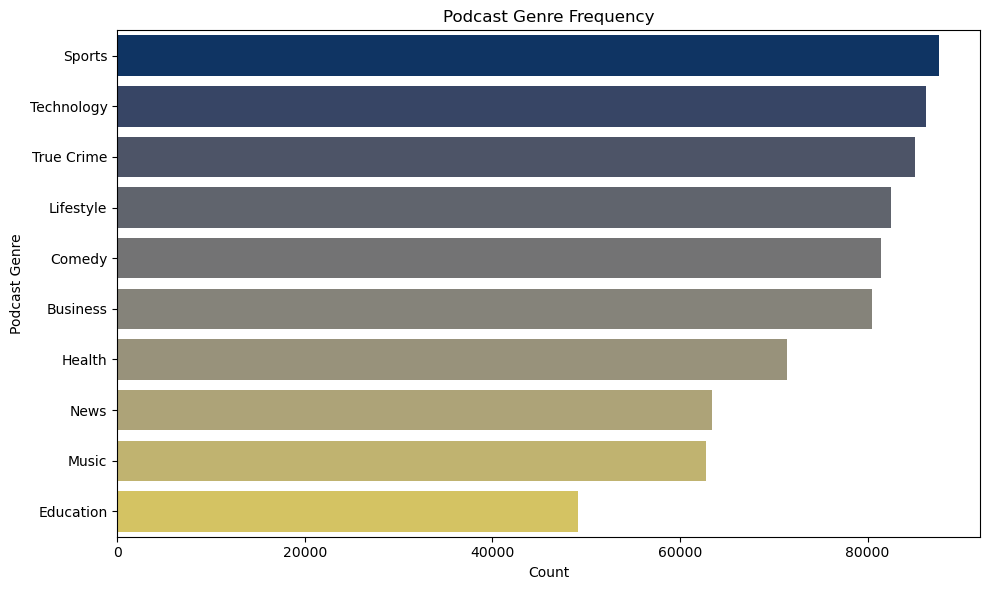

In [10]:
# Count the frequency of each genre
genre_counts = df['Genre'].value_counts()
print("There are the following podcast genre counts:\n")
print(genre_counts)
# Plot the genre distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='cividis')
plt.title('Podcast Genre Frequency')
plt.xlabel('Count')
plt.ylabel('Podcast Genre')
plt.tight_layout()
plt.show()

The bar chart shows the frequency of podcast genres in the dataset, with Sports, Technology, and True Crime being the most common genres, each appearing close to or above 85,000 times. Other popular genres include Lifestyle, Comedy, and Business. On the lower end are Education, Music, and News. I would have hypothesized that Comedy would be the top genre, but I’m not surprised to see True Crime ranking so high on the chart.

In [11]:
#value count of publication days 
day_counts = df['Publication_Day'].value_counts()
day_counts

Publication_Day
Sunday       115946
Monday       111963
Friday       108237
Wednesday    107886
Thursday     104360
Saturday     103505
Tuesday       98103
Name: count, dtype: int64

Next, I checked the Publication_Day column. The most frequent day for publication is Sunday, with 115,946 episodes. The other days don’t rank too far behind, with most exceeding 100,000 publications. The lowest day of publication is Tuesday, at 98,103 episodes, which is just under the 100,000 mark. This suggests that while Sunday is slightly more popular for releasing episodes, podcasts are published fairly evenly throughout the week.

### Below is a point line plot of the publication days

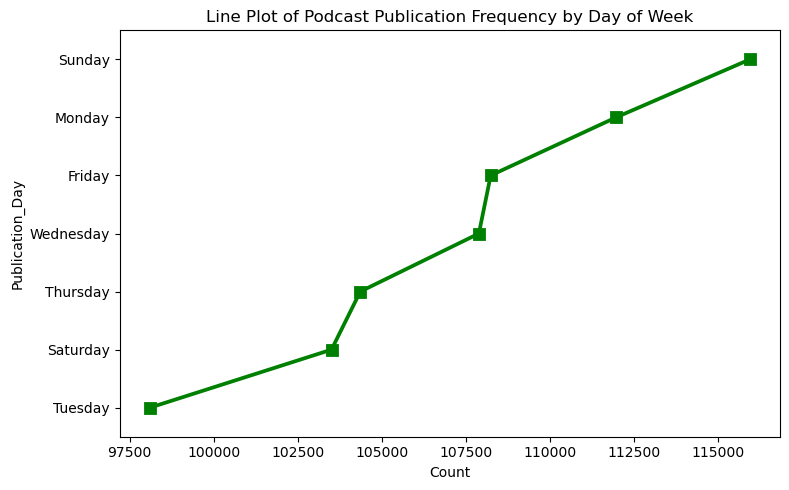

In [12]:
#value count 
day_counts = df['Publication_Day'].value_counts().reset_index()
day_counts.columns = ['Publication_Day', 'Count']
# plot of line point graph 
plt.figure(figsize=(8, 5))
sns.pointplot(data=day_counts, x='Count', y='Publication_Day', color='green', marker="s", linestyle='-')
plt.title('Line Plot of Podcast Publication Frequency by Day of Week') # title 
plt.tight_layout()
plt.show()

In [13]:
# Filter numerical and categorical columns
numer_features = df.select_dtypes(include=['int64', 'float64']).columns
categ_features = df.select_dtypes(include=['object', 'category']).columns

# Print the number of each type
print('There are', len(numer_features), 'numerical features')
print('There are', len(categ_features), 'categorical features')

# column names in each type
print('Numerical features are', list(numer_features) )
print('Categorical features are', list(categ_features) )

There are 6 numerical features
There are 6 categorical features
Numerical features are ['id', 'Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage', 'Number_of_Ads', 'Listening_Time_minutes']
Categorical features are ['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']


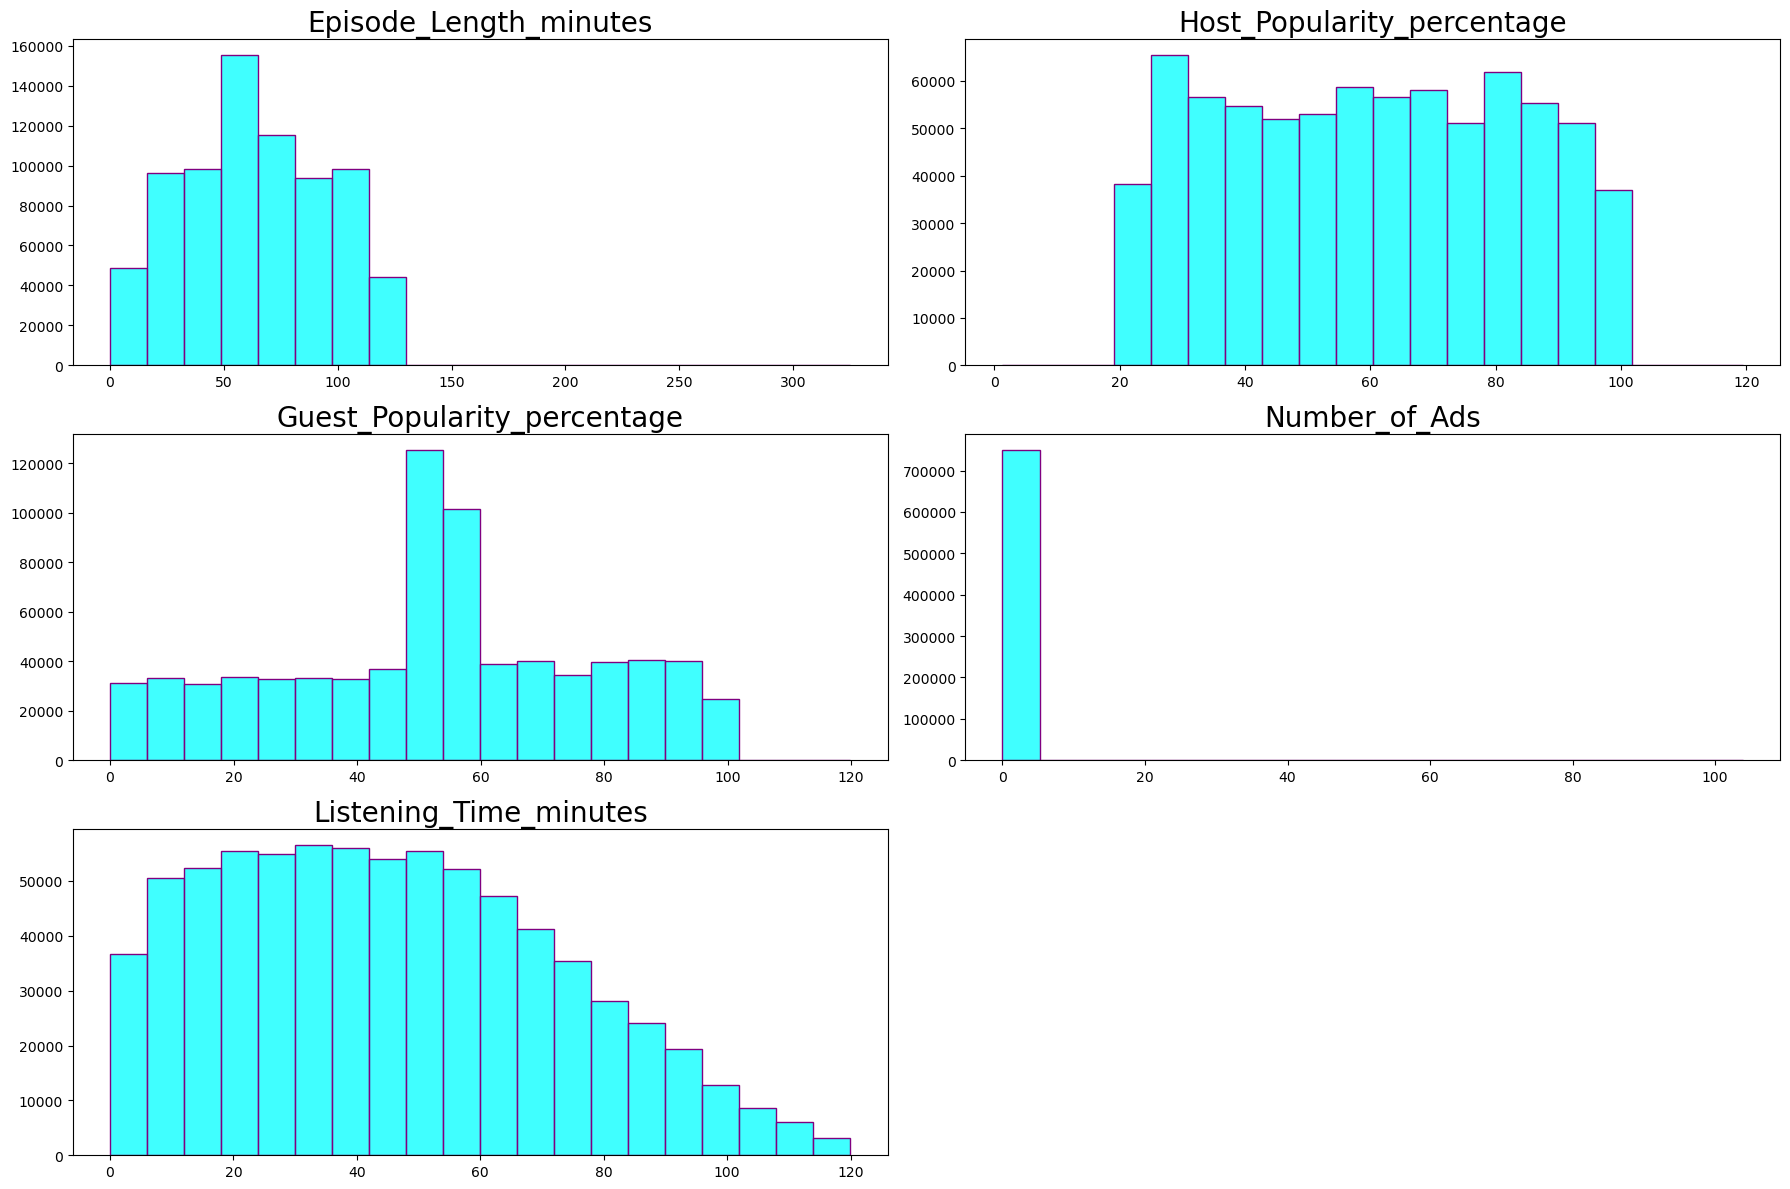

In [14]:
# histogram of all numerical feature excluding 'id'
numer_features = [col for col in numer_features if col != 'id'] # Remove 'id' from numeric features 
# Grid setup
n_cols = 2
n_rows = 3
plt.figure(figsize=(18, 12)) 

# Loop through and plot each numeric feature
for i, col in enumerate(numer_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col],bins=20, color='aqua', edgecolor='purple')
    plt.title(col, fontsize=20)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


The histograms show that Episode_Length_minutes has a right-skewed distribution, with most episodes falling between 40 and 100 minutes. A few outliers exceed 150 minutes, which is somewhat unusual. Host_Popularity_percentage appears to be fairly uniform, with values spread evenly between 20% and 100%. Guest_Popularity_percentage peaks around 50%, indicating that mid-level guest popularity is common. The Number_of_Ads feature is extremely right-skewed, with most episodes containing 0 to 1 ads and very few containing higher numbers. Listening_Time_minutes is moderately right-skewed, peaking between 40 and 60 minutes, but also includes some longer sessions reaching up to 120 minutes. Overall, both Episode_Length_minutes and Listening_Time_minutes show similar skewed patterns, suggesting that longer content is occasionally produced and consumed, but less frequently.

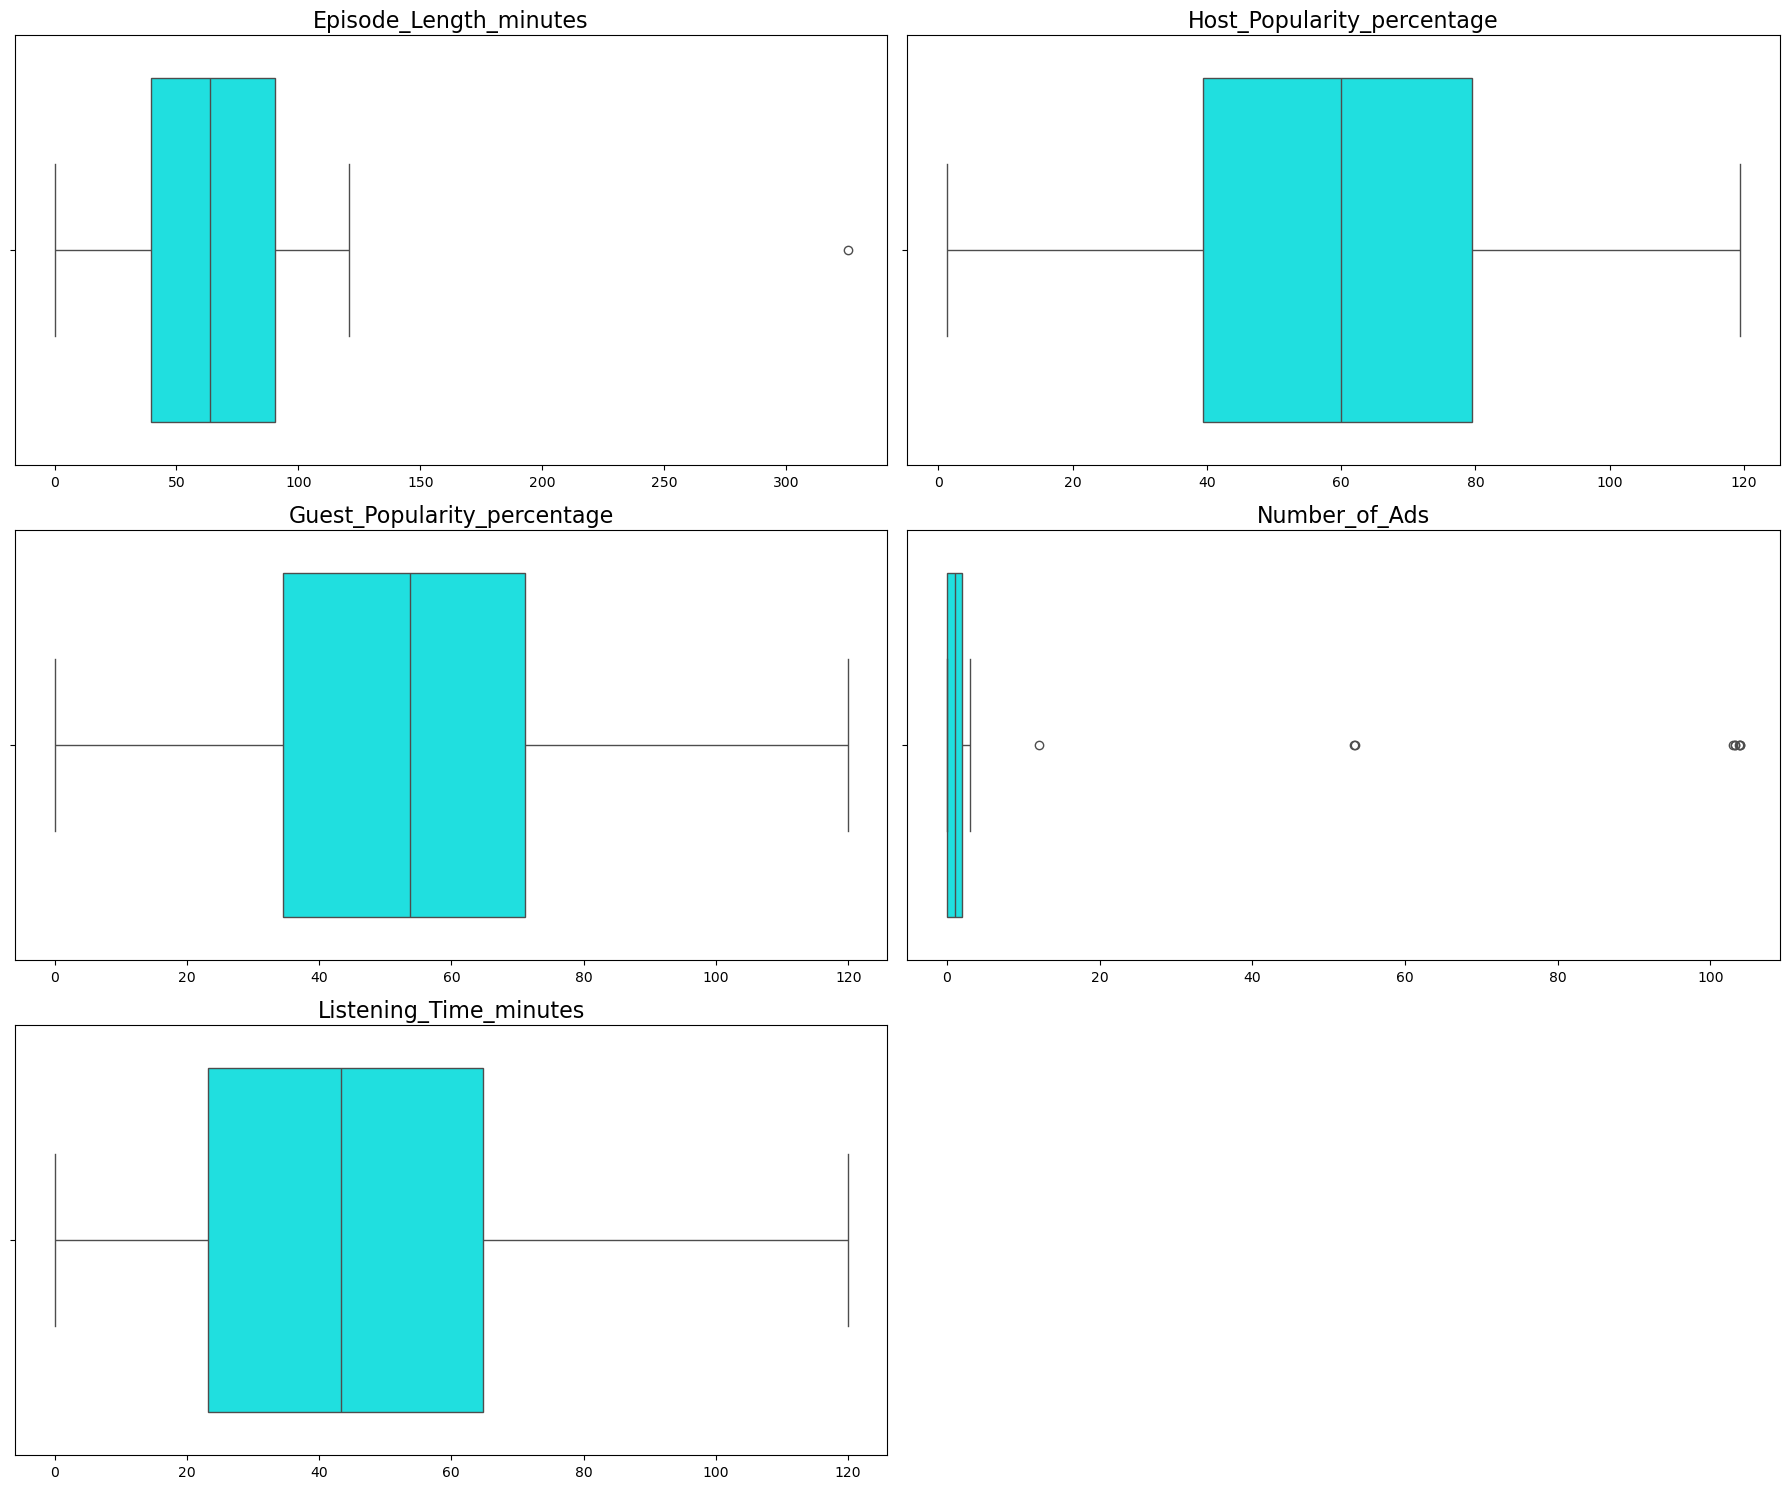

In [15]:
# boxplot of all numerical feature excluding 'id'
numer_features = [col for col in numer_features if col != 'id'] # Remove 'id' from numeric features if still present

# Grid setup
n_cols = 2
n_rows = int(np.ceil(len(numer_features) / n_cols))  # adjusts to actual feature count
plt.figure(figsize=(18, 5 * n_rows))

# Loop through and plot each numeric feature
for i, col in enumerate(numer_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col], color='aqua')
    plt.title(col, fontsize=16)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

The boxplots gave me some new insights that weren’t as clear from the histograms especially when it comes to identifying outliers. While the histograms showed general skewness in some features, the boxplots clearly highlighted extreme values in Episode_Length_minutes and Number_of_Ads. They also helped me quickly compare the spread and symmetry across numerical features. 

# Bivariate Exploratory Analysis

/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_45962/1920028501.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='Listening_Time_minutes', palette='viridis')
/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_45962/1920028501.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='Listening_Time_minutes', palette='viridis')
/var/folders/vm/yw_yxkcd5l793rcmvv4s7ncm0000gn/T/ipykernel_45962/1920028501.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='Listening_Time_

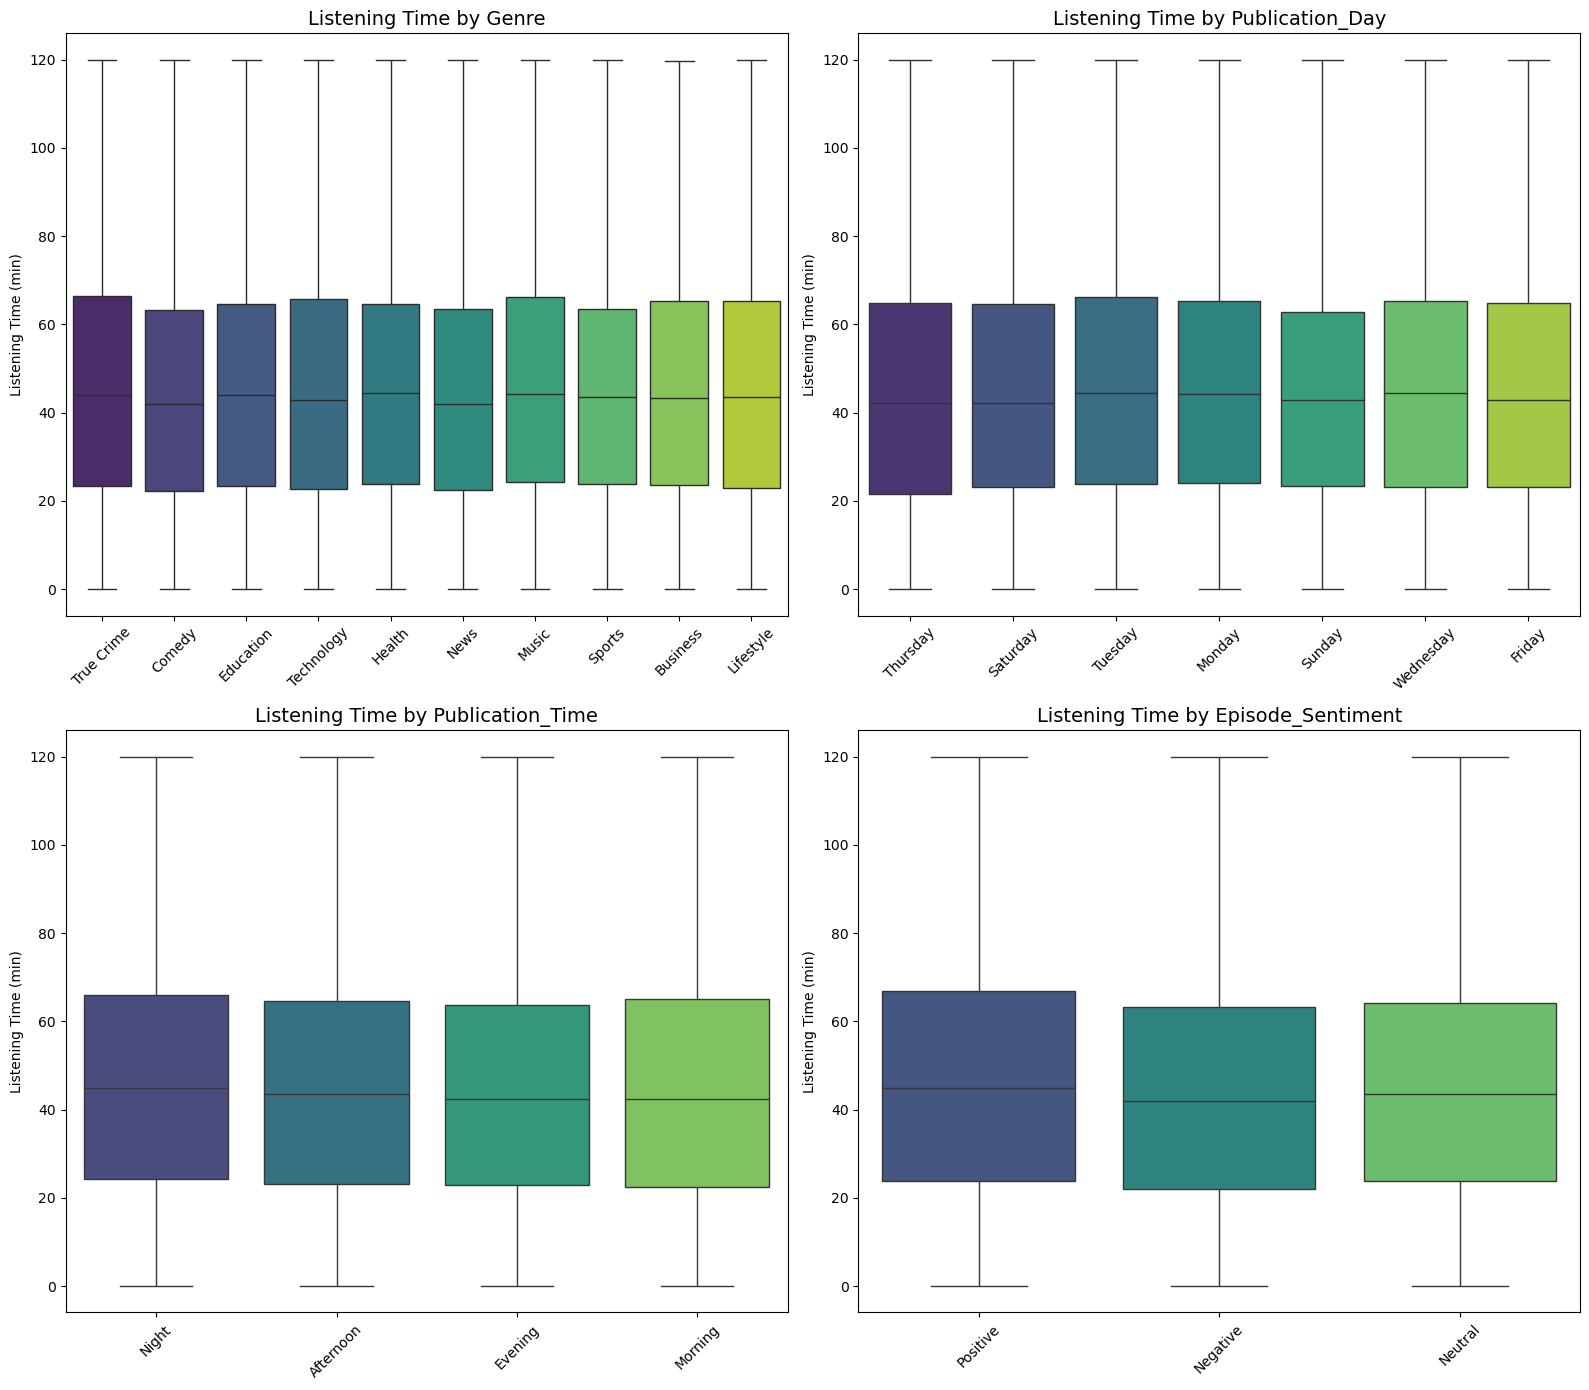

In [16]:
# remove Podcast_Name, Episode_Title
categ_features = [col for col in categ_features if col not in ['Podcast_Name', 'Episode_Title']]
# Grid setup
n_cols = 2
n_rows = 2  # Adjust this if you have more than 4 categorical features
plt.figure(figsize=(16, 14))  # Increase height to fit longer category names
# Loop through and create each subplot
for i, col in enumerate(categ_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df, x=col, y='Listening_Time_minutes', palette='viridis')
    plt.title(f'Listening Time by {col}', fontsize=14)
    plt.xticks(rotation=45)
    plt.xlabel('')
    plt.ylabel('Listening Time (min)')
plt.tight_layout()
plt.show()


The boxplots show that listening time is fairly consistent across genres, with no major differences in medians or spread, though Lifestyle and Business genres show slightly higher upper ranges. Publication day also doesn’t appear to heavily influence listening time, as all days follow a similar pattern in distribution. For episode sentiment, Positive episodes have a slightly higher median listening time compared to Neutral and Negative episodes, but the difference isn’t substantial. Overall, listening behavior appears relatively simmilar across these categories.

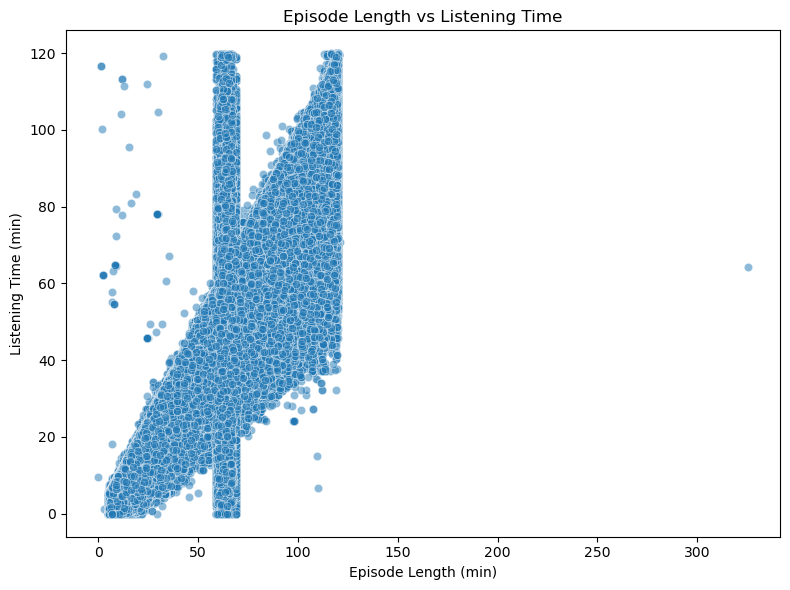

In [17]:
# scatter plot of Episode_Length_minutes compare to Listening_Time_minutes
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Episode_Length_minutes', y='Listening_Time_minutes', alpha=0.5)
plt.title('Episode Length vs Listening Time') #title 
plt.xlabel('Episode Length (min)')
plt.ylabel('Listening Time (min)')#labels 
plt.tight_layout()
plt.show() 


The scatter plot shows a positive relationship between episode length and listening time longer episodes generally lead to longer listening durations. There are noticeable vertical lines around the 60 minute and 120 minute marks, suggesting that many episodes are created with fixed durations of 1 or 2 hours. These lines indicate that certain episode lengths are more common. Overall, the plot confirms that while longer episodes tend to attract more listening time

In [18]:
df['Episode_Sentiment'].value_counts()

Episode_Sentiment
Neutral     251291
Negative    250116
Positive    248593
Name: count, dtype: int64

I then became interested in exploring episode sentiment to see if it had any effect on how long people listened. To start, I looked at the value counts for the Episode_Sentiment column. The majority of episodes were labeled as Neutral (251,291), followed by Negative (250,116), and Positive (248,593). The distribution is fairly balanced, but Neutral sentiment is slightly more common in the dataset.

In [19]:
positive_df = df[df['Episode_Sentiment'] == 'Positive']
neutral_df = df[df['Episode_Sentiment'] == 'Neutral']
negative_df = df[df['Episode_Sentiment'] == 'Negative']

print("Avg listening time (Positive):", positive_df['Listening_Time_minutes'].mean())
print("Avg listening time (Neutral):", neutral_df['Listening_Time_minutes'].mean())
print("Avg listening time (Negative):", negative_df['Listening_Time_minutes'].mean())


Avg listening time (Positive): 46.723814785050244
Avg listening time (Neutral): 45.499109605716086
Avg listening time (Negative): 44.09683776851541


After that, I filtered the episodes by sentiment and calculated the average listening time for each group. The average listening time for Positive episodes was 46.72 minutes, Neutral episodes averaged 45.50 minutes, and Negative episodes had the lowest average at 44.10 minutes. While the differences aren’t dramatic, the trend suggests that episodes with a more positive sentiment may keep listeners engaged for a bit longer.

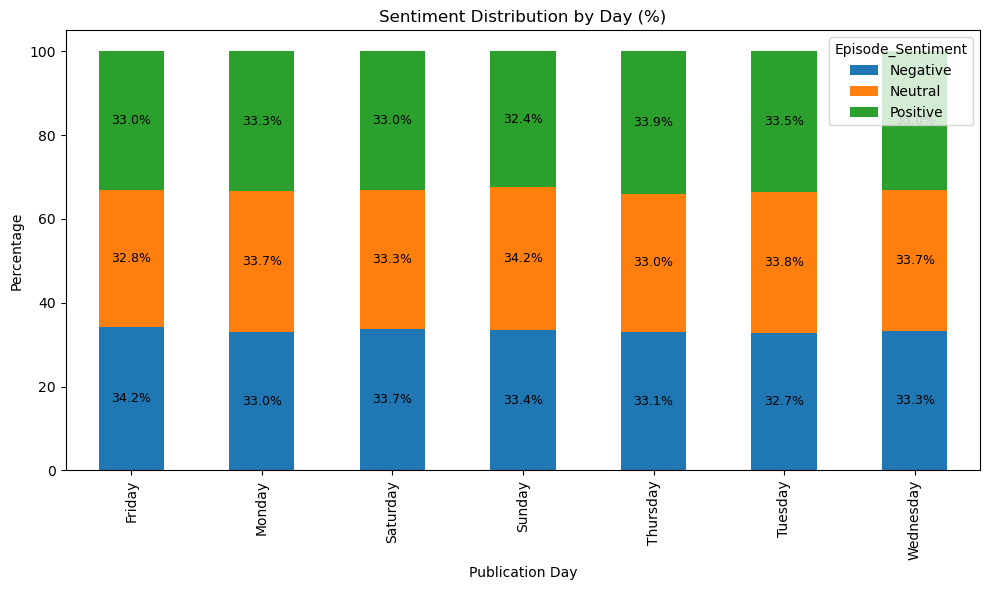

In [20]:
# stacked bar chart 
sentiment_distribution = df.groupby('Publication_Day')['Episode_Sentiment'].value_counts(normalize=True).unstack()
# Calculate raw counts instead of proportions
sentiment_counts = df.groupby('Publication_Day')['Episode_Sentiment'].value_counts().unstack()
# Calculate percentages manually
sentiment_pct = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100
# Plot
ax = sentiment_pct.plot(kind='bar', stacked=True, figsize=(10,6))
# Add percentage labels (only show if >5% for readability)
for container in ax.containers:
    ax.bar_label(container, 
               labels=[f'{h:.1f}%' if h > 5 else '' for h in container.datavalues],
               label_type='center',
               fontsize=9)
# title, labels 
plt.title('Sentiment Distribution by Day (%)')
plt.ylabel('Percentage')
plt.xlabel('Publication Day')
plt.tight_layout()
plt.show()

I became interested in the sentiment feature and wanted to understand how sentiment varies across the week. To explore this, I created a stacked bar chart showing the percentage distribution of episode sentiments by publication day. This plot makes it easy to compare the proportions of Positive, Neutral, and Negative episodes side by side for each day. I chose this graph because it highlights subtle differences in sentiment trends that might be missed in raw counts. From the chart, it’s clear that sentiment distribution is fairly consistent throughout the week, with only slight variations from day to day.

# Multivariate 

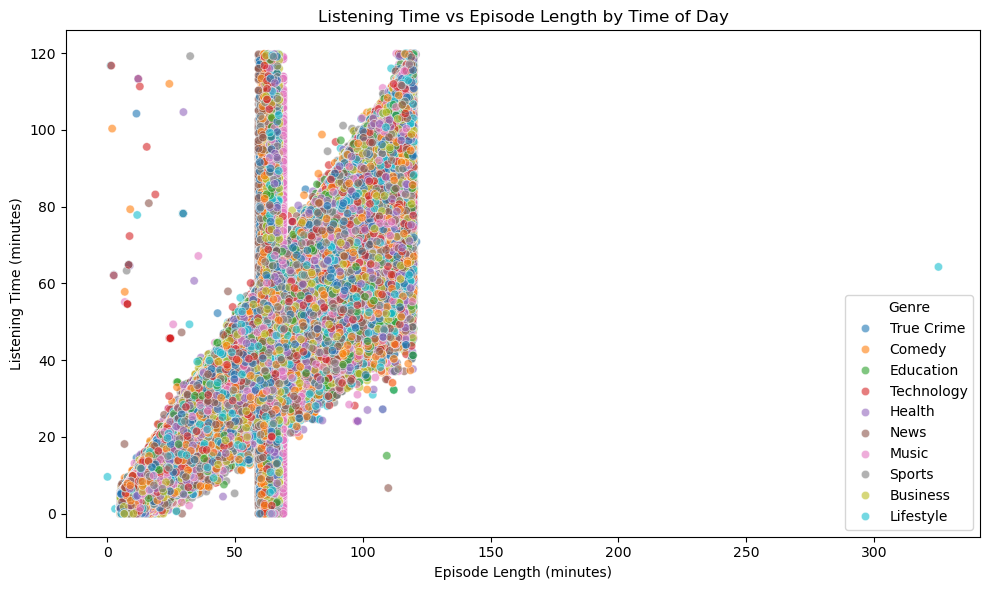

In [21]:
# scatter plot hue by genre
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Episode_Length_minutes', y='Listening_Time_minutes', hue='Genre', alpha=0.6) #plot 
plt.title('Listening Time vs Episode Length by Time of Day') #title
plt.xlabel('Episode Length (minutes)')#labels 
plt.ylabel('Listening Time (minutes)')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()


Lastly, for my multivariate plot, I recreated the original scatter plot but added genre as the hue. I wanted to see if certain genres stood out in terms of episode length or listening time. From looking at the graph, it's clear that genre does affect listening time, but there isn’t a strong or consistent ranking across genres. All genres appear to follow the same general trend: longer episodes tend to lead to longer listening times. However, no single genre dominates the top or bottom of the chart. This suggests that while content type may influence engagement, episode length is a stronger factor than genre when it comes to listening behavior.